In [20]:
#import modules
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns
import pickle as pk
pd.set_option('display.max_columns', None)

In [21]:
#import train and test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [23]:
train.shape

(550068, 12)

In [24]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [25]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [26]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [27]:
test.shape

(233599, 11)

In [28]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [29]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

#### we are able to see more null values in Product_Category_2 and Product_Category_3, let us check the value counts for each category.

In [30]:
print("Product_Category_1,  count")
train['Product_Category_1'].value_counts()

Product_Category_1,  count


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [31]:
print("Product_Category_2,  count")
train['Product_Category_2'].value_counts()

Product_Category_2,  count


8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [32]:
print("Product_Category_3,  count")
train['Product_Category_3'].value_counts()

Product_Category_3,  count


16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

## Let's look at the distibution of our Purchase amount(dependant variable)

In [33]:
#plt.style.use('ggplot')
#plt.figure(figsize=(10,6))
#sns.distplot(train.Purchase, bins=50, kde=False)

### Looks like the distribution has a positive skew i.e, has a long tail towards right.

## Explore categoricals like Gender, Age, City etc from train dataset by plotting

In [34]:
#plt.figure(figsize=(3,3))
#sns.countplot(train.Gender)

In [35]:
#plt.figure(figsize=(3,3))
#sns.countplot(train.Marital_Status)

In [36]:
#Comment this as of now and use directly 
#Let us create a function to plot this 
#def count_plot(dataframe, column_name, title =None, hue = None):
#    '''
#    Function to plot seaborn count plot
#    Input: Dataframe name that has to be plotted, column_name that has to be plotted, title for the graph
#    Output: Plot the data as a count plot
#    '''
#    base_color = sns.color_palette()[0]
#    sns.countplot(data = dataframe, x = column_name, hue=hue)
#    plt.title(title)
#    pass

#let us create an quick & simple bar plot based on pandos plot method
#def simple_bar_plot(data, title = None):
#    '''
#    A simple bar plot based on pandas plot method
#    Input: data to be plotted and title for the plot
#    Output: the plotled graph
#    '''
#    data.plot("bar", title = title)
#    pass

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(train.Age)

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(train.City_Category)

In [37]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [38]:
# Deep copy the original data frame, so that changes made in copy will not impact the original version
train_copy = train.copy()

In [39]:
print ("Shape of Original df:{}".format(train.shape))
print ("Shape of Copy df_copy:{}".format(train_copy.shape))

Shape of Original df:(550068, 12)
Shape of Copy df_copy:(550068, 12)


In [40]:
train_copy.dropna(inplace=True)

In [41]:
print ("Shape of Original df:{}".format(train.shape))
print ("Shape of Copy df_copy:{}".format(train_copy.shape))

Shape of Original df:(550068, 12)
Shape of Copy df_copy:(166821, 12)


In [42]:
train_copy[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
1,P00248942,1,6.0,14.0
6,P00184942,1,8.0,17.0
13,P00145042,1,2.0,5.0
14,P00231342,5,8.0,14.0
16,P0096642,2,3.0,4.0


In [43]:
print("Shape of the original data set : {}".format(train.shape))
print("Shape of the NaN removed data set : {}".format(train_copy.shape))

Shape of the original data set : (550068, 12)
Shape of the NaN removed data set : (166821, 12)


In [44]:
#df_copy.dropna().shape[0]/df_copy.shape[0]
print ("Propotion of missing values in df :{0:.2f}".format((train.shape[0] - train_copy.shape[0])/train.shape[0]))

Propotion of missing values in df :0.70


**Removing the NaN values is resulting in loss of 70% data in the data set**.
This results in *bias-ed* model causing the model to be underfit.

The available alternate approaches are imputing the missing values with mean, mode or fill with 0. 
since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, 
hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.

In [45]:
#Fill na with Zero
train.fillna(0, inplace=True)

In [46]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [47]:
train_Columns = train.columns.values
train_Columns

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'], dtype=object)

In [48]:
test.fillna(0, inplace=True)

In [49]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [50]:
test_Columns = test.columns.values
test_Columns

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],
      dtype=object)

In [51]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [52]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

### A vast majority of customers belong to the age group of 26-35 years, followed by 36-45 years and 18-25 years.

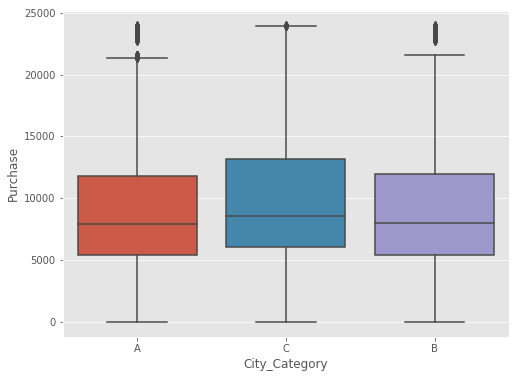

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x=train.City_Category, y=train.Purchase)

##### Ths boxplot shows that the customers belonging to city C tend to shop for slightly 
##### higher amounts than those belonging to cities A and B.

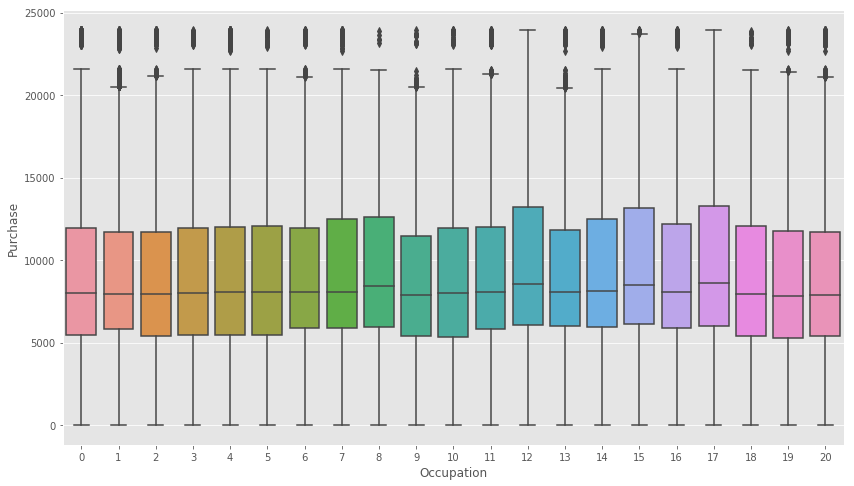

In [38]:
plt.figure(figsize=(14,8))
sns.boxplot(x=train.Occupation, y=train.Purchase)

### This boxplot shows that customers indulged in different professions shop for more or less similar amounts. Therefore, customer's occupation have little to do with how much they're going to spend.

# Feature Engineering part

In [53]:
def mapFrequencyCount(df1,df2,variable):
    '''
    This function will replace categorical variable with the ferquency of occurences
    '''
    new_Column = variable + '_count' 
    newColumnMapDict = df1[variable].value_counts().to_dict()
    df1[variable + '_count'] = df1[variable].map(newColumnMapDict)
    df2[variable + '_count'] = df2[variable].map(newColumnMapDict)

In [54]:
mapFrequencyCount(train,test,'User_ID')
mapFrequencyCount(train,test,'Product_ID')
mapFrequencyCount(train,test,'City_Category')
mapFrequencyCount(train,test,'Age')
mapFrequencyCount(train,test,'Stay_In_Current_City_Years')

In [55]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,35,227,147720,15102,101838
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,35,581,147720,15102,101838
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,35,102,147720,15102,101838
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,35,341,147720,15102,101838
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,77,203,171175,21504,84726


In [56]:
train.isnull().sum()

User_ID                             0
Product_ID                          0
Gender                              0
Age                                 0
Occupation                          0
City_Category                       0
Stay_In_Current_City_Years          0
Marital_Status                      0
Product_Category_1                  0
Product_Category_2                  0
Product_Category_3                  0
Purchase                            0
User_ID_count                       0
Product_ID_count                    0
City_Category_count                 0
Age_count                           0
Stay_In_Current_City_Years_count    0
dtype: int64

In [57]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0,14,936.0,231173,45701,101838
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0,58,254.0,171175,219587,74398
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0,223,142.0,231173,110013,84726
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0,223,15.0,231173,110013,84726
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,70,567.0,171175,219587,193821


In [58]:
test.isnull().sum()

User_ID                              0
Product_ID                           0
Gender                               0
Age                                  0
Occupation                           0
City_Category                        0
Stay_In_Current_City_Years           0
Marital_Status                       0
Product_Category_1                   0
Product_Category_2                   0
Product_Category_3                   0
User_ID_count                        0
Product_ID_count                    61
City_Category_count                  0
Age_count                            0
Stay_In_Current_City_Years_count     0
dtype: int64

In [59]:
# let's create a variable to replace NA with the most frequent label
def impute_na(df, variable):
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df[variable] = df[variable].fillna(most_frequent_category)

In [60]:
impute_na(test,'Product_ID_count')

In [61]:
#For mapping mean purchase amount by userId
map_purchase_mean_by_userId = train.groupby('User_ID_count')['Purchase'].mean().to_dict()
#For mapping mean purchase amount by userId
map_purchase_mean_by_productId = train.groupby('Product_ID_count')['Purchase'].mean().to_dict()

In [62]:
train['Purchase_mean_by_UserId'] = train['User_ID_count'].map(map_purchase_mean_by_userId)
test['Purchase_mean_by_UserId'] = test['User_ID_count'].map(map_purchase_mean_by_userId)

train['Purchase_mean_by_ProductId'] = train['Product_ID_count'].map(map_purchase_mean_by_productId)
test['Purchase_mean_by_ProductId'] = test['Product_ID_count'].map(map_purchase_mean_by_productId)

In [63]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count,Purchase_mean_by_UserId,Purchase_mean_by_ProductId
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,35,227,147720,15102,101838,9648.337888,13164.778267
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,35,581,147720,15102,101838,9648.337888,16304.030981
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,35,102,147720,15102,101838,9648.337888,5421.266340
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,35,341,147720,15102,101838,9648.337888,7312.945259
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,77,203,171175,21504,84726,10195.870629,6499.700739


In [64]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count,Purchase_mean_by_UserId,Purchase_mean_by_ProductId
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0,14,936.0,231173,45701,101838,9571.594752,14692.646902
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0,58,254.0,171175,219587,74398,10154.213054,10978.192913
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0,223,142.0,231173,110013,84726,8616.834081,3821.187793
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0,223,15.0,231173,110013,84726,8616.834081,6540.487719
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,70,567.0,171175,219587,193821,10213.496786,5095.372134


### Observed missing values in Purchase_mean_by_ProductId we need to replace this values
### replace missing values in Purchase_mean_by_ProductId by mean imputation method


In [65]:
test.isnull().sum()

User_ID                             0
Product_ID                          0
Gender                              0
Age                                 0
Occupation                          0
City_Category                       0
Stay_In_Current_City_Years          0
Marital_Status                      0
Product_Category_1                  0
Product_Category_2                  0
Product_Category_3                  0
User_ID_count                       0
Product_ID_count                    0
City_Category_count                 0
Age_count                           0
Stay_In_Current_City_Years_count    0
Purchase_mean_by_UserId             0
Purchase_mean_by_ProductId          0
dtype: int64

In [66]:
# obtaining k-1 labels
train = pd.get_dummies(train, drop_first=True, columns=['Gender'])
test = pd.get_dummies(test, drop_first=True, columns=['Gender'])

In [67]:
train = train.drop(['Product_ID','City_Category','Age','Stay_In_Current_City_Years'],axis = 1)
train.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count,Purchase_mean_by_UserId,Purchase_mean_by_ProductId,Gender_M
0,1000001,10,0,3,0.0,0.0,8370,35,227,147720,15102,101838,9648.337888,13164.778267,0
1,1000001,10,0,1,6.0,14.0,15200,35,581,147720,15102,101838,9648.337888,16304.030981,0
2,1000001,10,0,12,0.0,0.0,1422,35,102,147720,15102,101838,9648.337888,5421.266340,0
3,1000001,10,0,12,14.0,0.0,1057,35,341,147720,15102,101838,9648.337888,7312.945259,0
4,1000002,16,0,8,0.0,0.0,7969,77,203,171175,21504,84726,10195.870629,6499.700739,1


In [68]:
test = test.drop(['Product_ID','City_Category','Age','Stay_In_Current_City_Years'],axis = 1)
test.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count,Purchase_mean_by_UserId,Purchase_mean_by_ProductId,Gender_M
0,1000004,7,1,1,11.0,0.0,14,936.0,231173,45701,101838,9571.594752,14692.646902,1
1,1000009,17,0,3,5.0,0.0,58,254.0,171175,219587,74398,10154.213054,10978.192913,1
2,1000010,1,1,5,14.0,0.0,223,142.0,231173,110013,84726,8616.834081,3821.187793,0
3,1000010,1,1,4,9.0,0.0,223,15.0,231173,110013,84726,8616.834081,6540.487719,0
4,1000011,1,0,4,5.0,12.0,70,567.0,171175,219587,193821,10213.496786,5095.372134,0


## Feature scaleing

In [69]:
# Training and test values allocation
X = train.drop(['User_ID','Purchase'], axis=1).values
y = train['Purchase'].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [73]:
X_test = sc_X.transform(X_test)

In [58]:
meanX = sc_X.mean_
varX = sc_X.var_

In [59]:
meanX

array([8.07821123e+00, 4.09253935e-01, 5.41098359e+00, 6.73272354e+00,
       3.84487868e+00, 2.16327976e+02, 4.50640054e+02, 1.90116404e+05,
       1.35467012e+05, 1.26792728e+05, 9.26527736e+03, 9.26255183e+03,
       7.53471654e-01])

In [60]:
varX

array([4.25295864e+01, 2.41765152e-01, 1.55285060e+01, 3.86198296e+01,
       3.90696402e+01, 3.05815510e+04, 1.32176555e+05, 1.30268427e+09,
       5.41760409e+09, 2.51387003e+09, 5.67307932e+05, 1.05619240e+07,
       1.85752121e-01])

In [61]:
X_train

array([[ 0.44802602,  1.20144526, -0.10429408, ...,  0.08298929,
        -0.77073278,  0.57200519],
       [ 1.36806382, -0.83233089, -1.11936212, ...,  0.83193798,
         1.38976773,  0.57200519],
       [ 0.44802602,  1.20144526, -1.11936212, ..., -1.4512198 ,
         2.08754679,  0.57200519],
       ...,
       [-0.16533251, -0.83233089,  0.65700695, ..., -1.34744612,
        -0.54563698, -1.74823588],
       [ 1.06138455, -0.83233089,  0.14947293, ...,  0.38197753,
         0.70995172,  0.57200519],
       [-1.08537031,  1.20144526,  2.68714303, ..., -1.37216587,
         0.82619461,  0.57200519]])

In [62]:
X_test = sc_X.transform(X_test)
X_test

array([[-0.31867215, -0.83233089,  0.65700695, ..., -2.25769377,
        -0.72516381,  0.57200519],
       [-0.31867215,  1.20144526,  0.65700695, ...,  0.48991757,
        -0.4660531 , -1.74823588],
       [ 0.75470528,  1.20144526,  1.41830798, ...,  0.36605679,
         0.31179295,  0.57200519],
       ...,
       [ 0.60136565,  1.20144526,  1.41830798, ...,  0.17032654,
        -0.74045246,  0.57200519],
       [ 1.67474308, -0.83233089,  1.41830798, ...,  0.45983983,
        -0.44390525,  0.57200519],
       [ 0.60136565,  1.20144526, -1.11936212, ...,  1.03387562,
        -0.07885201,  0.57200519]])

## Linear Regression model

In [63]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [64]:
b1 = regressor.coef_
b0 = regressor.intercept_

In [65]:
b1

array([  20.9071148 ,   14.42493049, -507.21396647,  -83.17217615,
        302.48248766,  185.02869555,  -92.2666743 ,   13.70333624,
        -40.67678647,  -15.89731563,  587.74036819, 2979.33661669,
         91.66890791])

In [66]:
b0

9257.389601790508

In [67]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 5375.80090754,  7392.50753323,  9390.29374485, ...,
        6134.5079616 ,  7363.31657202, 10603.34212774])

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('MSE: ',mse)
rmse = mse**0.5
print('RMSE: ',rmse)

MSE:  14022018.627200643
RMSE:  3744.5985936012744


In [69]:
#Save the model on disk
pk.dump(regressor, open('linear_regression.sav','wb'))

In [70]:
test.shape

(233599, 14)

In [71]:
test = test.drop(['User_ID'], axis=1).values
test.shape

(233599, 13)

In [72]:
test = sc_X.transform(test)
test

array([[-0.16533251,  1.20144526, -1.11936212, ...,  0.40668882,
         1.67084404,  0.57200519],
       [ 1.36806382, -0.83233089, -0.6118281 , ...,  1.18021443,
         0.52790396,  0.57200519],
       [-1.08537031,  1.20144526, -0.10429408, ..., -0.86091954,
        -1.67431151, -1.74823588],
       ...,
       [ 1.06138455,  1.20144526, -1.11936212, ..., -1.66939056,
         0.74908366, -1.74823588],
       [-1.08537031, -0.83233089,  1.16454097, ...,  1.19055526,
        -0.33059076, -1.74823588],
       [-1.23870995,  1.20144526, -0.35806109, ...,  0.08354418,
        -0.21366796, -1.74823588]])

In [73]:
pred_results = regressor.predict(test)
pred_results

array([14601.16980039, 11585.654804  ,  3495.38836465, ...,
       11736.13626583,  7895.51521499,  8456.29697511])

## Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 150, random_state = 0)
rf_reg.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
# Predicting a new result
y_pred = rf_reg.predict(X_test)
y_pred

array([ 6625.22444444,  7067.10666667,  4485.73333333, ...,
        5405.1       ,  5466.46666667, 15337.94      ])

In [76]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('MSE: ',mse)
rmse = mse**0.5
print('RMSE: ',rmse)

MSE:  7139535.109904126
RMSE:  2671.9908513885534


In [77]:
pred_results = rf_reg.predict(test)
pred_results

array([15278.29333333, 12322.84      ,  5663.56666667, ...,
       11384.60666667, 18100.27333333,  2732.03333333])

In [78]:
len(pred_results)

233599

In [79]:
#Save the model on disk
pk.dump(rf_reg, open('random_Forest_regression.sav','wb'))

# Feature importance selection of perticular column

In [80]:
train.shape

(550068, 15)

In [81]:
train.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count,Purchase_mean_by_UserId,Purchase_mean_by_ProductId,Gender_M
0,1000001,10,0,3,0.0,0.0,8370,35,227,147720,15102,101838,9648.337888,13164.778267,0
1,1000001,10,0,1,6.0,14.0,15200,35,581,147720,15102,101838,9648.337888,16304.030981,0
2,1000001,10,0,12,0.0,0.0,1422,35,102,147720,15102,101838,9648.337888,5421.266340,0
3,1000001,10,0,12,14.0,0.0,1057,35,341,147720,15102,101838,9648.337888,7312.945259,0
4,1000002,16,0,8,0.0,0.0,7969,77,203,171175,21504,84726,10195.870629,6499.700739,1


In [82]:
rf_reg.feature_importances_

array([0.03777125, 0.0081666 , 0.31281838, 0.01396026, 0.010094  ,
       0.05887339, 0.03595146, 0.01204073, 0.02196819, 0.02190487,
       0.06817838, 0.39116736, 0.00710513])

In [83]:
train_imp_columns = ['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'User_ID_count',
       'Product_ID_count', 'City_Category_count', 'Age_count',
       'Stay_In_Current_City_Years_count', 'Purchase_mean_by_UserId',
       'Purchase_mean_by_ProductId', 'Gender_M']

In [84]:
feat_imps = pd.concat([pd.DataFrame(train_imp_columns, columns=['Features']),
                       pd.DataFrame(rf_reg.feature_importances_, columns=['Importances'])],
                     axis=1)
feat_imps

,Features,Importances
0,Occupation,0.037771
1,Marital_Status,0.008167
2,Product_Category_1,0.312818
3,Product_Category_2,0.013960
4,Product_Category_3,0.010094
5,User_ID_count,0.058873
6,Product_ID_count,0.035951
7,City_Category_count,0.012041
8,Age_count,0.021968
9,Stay_In_Current_City_Years_count,0.021905


In [85]:
feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
feat_imps

,Features,Importances
11,Purchase_mean_by_ProductId,0.391167
2,Product_Category_1,0.312818
10,Purchase_mean_by_UserId,0.068178
5,User_ID_count,0.058873
0,Occupation,0.037771
6,Product_ID_count,0.035951
8,Age_count,0.021968
9,Stay_In_Current_City_Years_count,0.021905
3,Product_Category_2,0.013960
7,City_Category_count,0.012041


In [86]:
feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
feat_imps

,Features,Importances,Cumulative Importances
11,Purchase_mean_by_ProductId,0.391167,0.391167
2,Product_Category_1,0.312818,0.703986
10,Purchase_mean_by_UserId,0.068178,0.772164
5,User_ID_count,0.058873,0.831038
0,Occupation,0.037771,0.868809
6,Product_ID_count,0.035951,0.904760
8,Age_count,0.021968,0.926728
9,Stay_In_Current_City_Years_count,0.021905,0.948633
3,Product_Category_2,0.013960,0.962594
7,City_Category_count,0.012041,0.974634


In [87]:
feat_imps = feat_imps[feat_imps['Cumulative Importances'] < 0.90]
feat_imps

,Features,Importances,Cumulative Importances
11,Purchase_mean_by_ProductId,0.391167,0.391167
2,Product_Category_1,0.312818,0.703986
10,Purchase_mean_by_UserId,0.068178,0.772164
5,User_ID_count,0.058873,0.831038
0,Occupation,0.037771,0.868809


In [88]:
imp_cols = feat_imps['Features'].tolist()

# Creating function for feature selcetion demonstrated above

In [89]:
def feature_select(X, y, cols, cutoff):
    regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
    regressor.fit(X, y)
    feat_imps = pd.concat([pd.DataFrame(cols, columns=['Features']),
                       pd.DataFrame(regressor.feature_importances_, columns=['Importances'])],
                     axis=1)
    feat_imps = feat_imps.sort_values(['Importances'], ascending=False)
    feat_imps['Cumulative Importances'] = feat_imps['Importances'].cumsum()
    feat_imps = feat_imps[feat_imps['Cumulative Importances'] < cutoff]
    return feat_imps['Features'].tolist()    

In [90]:
#Getting memory error
#imp_cols = feature_select(X, y, train_imp_columns, 0.90) 
imp_cols

['Purchase_mean_by_ProductId',
 'Product_Category_1',
 'Purchase_mean_by_UserId',
 'User_ID_count',
 'Occupation']

# Using Selected Features only for Model training

In [91]:
X = train[imp_cols].values
X.shape

(550068, 5)

In [92]:
y = train['Purchase'].values
y.shape

(550068,)

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 100)

In [94]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
meanX = sc_X.mean_
varX = sc_X.var_

X_test = sc_X.transform(X_test)

In [95]:
# Fitting Multi Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression(n_jobs=-1)
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [96]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import mean_squared_error
print('RMSE for Multi Linear Regression with Selected Features: ',
      mean_squared_error(y_test,lin_regressor.predict(X_test))**0.5)
print('RMSE for Random Forest Regression with Selected Features: ',
      mean_squared_error(y_test,rf_regressor.predict(X_test))**0.5)

RMSE for Multi Linear Regression with Selected Features:  3753.7374452099243
RMSE for Random Forest Regression with Selected Features:  2850.811459270255


In [98]:
# Predicting a new result by linear regression selecting important parameters
y_pred_lin = lin_regressor.predict(X_test)
y_pred_lin

array([ 6834.89991274, 12317.13508568,  7656.6653371 , ...,
        7784.79355843,  7924.59022884,  8174.41813064])

In [99]:
# Predicting a new result by random forest regression selecting important parameters
y_pred_rf = rf_regressor.predict(X_test)
y_pred_rf

array([ 3717.25333333, 10875.012     ,  5536.32666667, ...,
        8167.36      ,  6490.87066667,  6313.16933333])

# Deep Learning model





In [74]:
train.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_count,Product_ID_count,City_Category_count,Age_count,Stay_In_Current_City_Years_count,Purchase_mean_by_UserId,Purchase_mean_by_ProductId,Gender_M
0,1000001,10,0,3,0.0,0.0,8370,35,227,147720,15102,101838,9648.337888,13164.778267,0
1,1000001,10,0,1,6.0,14.0,15200,35,581,147720,15102,101838,9648.337888,16304.030981,0
2,1000001,10,0,12,0.0,0.0,1422,35,102,147720,15102,101838,9648.337888,5421.266340,0
3,1000001,10,0,12,14.0,0.0,1057,35,341,147720,15102,101838,9648.337888,7312.945259,0
4,1000002,16,0,8,0.0,0.0,7969,77,203,171175,21504,84726,10195.870629,6499.700739,1


In [136]:
train.shape

(550068, 15)

In [203]:
# Importing the Keras libraries and packages
import keras
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.layers.merge import concatenate
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [204]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [205]:
# Initialising the ANN
classifier = Sequential()

In [206]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = X_train.shape[1], 
                     kernel_initializer = 'uniform', 
                     activation = 'relu',
                     input_dim = X_train.shape[1]))

In [207]:
# Adding the second hidden layer
classifier.add(Dense(units = 7, 
                     kernel_initializer = 'uniform',
                     activation = 'relu'))

In [208]:
# Adding a Dropout
classifier.add(Dropout(rate = 0.2))

In [209]:
# Adding the output layer
classifier.add(Dense(units = 1)) 
                     #kernel_initializer = 'uniform')) 
                     #activation = 'linear'))

In [224]:
# Compiling the ANN
classifier.compile(optimizer = 'adamax', 
                   loss = 'mean_squared_error', 
                   metrics = ['accuracy'])

In [225]:
#monitor = EarlyStopping(monitor = 'val_loss',min_delta = 1e-3, patience =5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint (filepath ="best_weights.hdf5", verbose = 0, save_best_only = True)

In [226]:
X_train.shape

(385047, 13)

In [227]:
# Fitting the ANN to the Training set
model = classifier.fit(X_train,
               y_train,
               batch_size = 128,
               epochs = 10,
               callbacks = [checkpointer], verbose = 0,
               validation_data=(X_test, y_test))

In [228]:
his_df = pd.DataFrame(model.history)

In [229]:
his_df

,val_loss,val_acc,loss,acc
0,NaN,0.0,NaN,0.0
1,NaN,0.0,NaN,0.0
2,NaN,0.0,NaN,0.0
3,NaN,0.0,NaN,0.0
4,NaN,0.0,NaN,0.0
5,NaN,0.0,NaN,0.0
6,NaN,0.0,NaN,0.0
7,NaN,0.0,NaN,0.0
8,NaN,0.0,NaN,0.0
9,NaN,0.0,NaN,0.0


# Export final result to csv

In [79]:
subCSV = pd.read_csv("Sample_Submission.csv")
subCSV.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,9000
1,1000009,P00113442,9000
2,1000010,P00288442,9000
3,1000010,P00145342,9000
4,1000011,P00053842,9000


In [80]:
subCSV['Purchase'] = pred_results

In [81]:
pred_results = pred_results.tolist()

In [82]:
subCSV.to_csv("BlackFridayForest.csv",index=False)